# Lendo dados de geociência

## License

All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


## IMPORTANTE

Agora que vocês sabem técnicas de programação defensiva, eu espero que todo o código que vocês fizerem abaixo utilizem essas técnicas. Crie docstrings para suas funções, cheque as entradas (quando for possível) e cheque as saídas. **Não esqueçam dos comentários**.

## Temperatura no Rio de Janeiro

O arquivo `data/23.31S-42.82W-TAVG-Trend.txt` contém dados de temperatura média mensal para a cidade do Rio de Janeiro. O arquivo também contém médias móveis anual, 5, 10 e 20 anos. Esses dados foram baixados do site Berkeley Earth (http://berkeleyearth.lbl.gov/locations/23.31S-42.82W).

### Tarefa

Faça duas funções, uma que lê os dados de temperatura mensal, outra que lê os dados da média móvel anual.
As duas funções devem:

* Receber como entrada **somente** o nome do arquivo de dados.
* Retornar duas listas: uma com as datas referentes aos dados e outra com os dados de temperatura.
* As datas retornadas devem ser em anos decimais. Ex: Janeiro de 1984 seria 1984.0833333333333 (1984 + 1/12).
* Datas sem valores de temperatura (NaN) devem ser ignoradas (não incluidas nas listas).

Utilize suas funções para carregar os dados e fazer um gráfico da temperatura média mensal e média movel anual pelo tempo.

In [129]:
def ler_temp(nome_arq):
    
    #Iniciando as variaveis básicas
    vetor_dados = []
    arq_lido = open(nome_arq)
    datas = []
    dados = []
    dados_temp = []
    linha_temp = []
    datas_decimais = []
    #Este bloco de programa tem por objetivo filtrar os dados do arquivo lido, segundo o professor estabeleceu na pratica.
    for item in arq_lido:
        vetor_dados.append(item)
    n_linhas = len(vetor_dados)
    for item in range(0, n_linhas -1  , 1):
            if vetor_dados[item][0] != '%':
                linha = vetor_dados[item].split()
                if len(linha) != 0 and linha[4] != 'NaN':
                    #apartir daqui, teremos um vertor bidimensional chamado dados_temp, que ira conter os dados, ainda não tratados, porém selecionados segundo o filtro do bloco anterior.
                    dados_temp.append(linha)
    num = len(dados_temp)
    #aqui inicia-se o bloco que irá fatiar a lista de dados_temp e separar o que é data de dados.
    for i in range(num):
        linha_temp.append([])
        for j in range(len(dados_temp[0])):
            var = dados_temp[i][j]
            linha_temp[i].append(float(var))
    for ele in range(len(linha_temp)):
        temp = linha_temp[ele]
        datas.append(temp[0:2])
        dados.append(temp[2:13])
    #calculando as dadas decimais.
    for indice in range(len(datas)):
        datas_decimais.append([])
        datas_decimais[indice].append(datas[indice][0]+ datas[indice][1]/12)
    dados_array = np.array(dados)
    
    plt.figure(figsize = [8, 4])
    plt.plot(datas_decimais, dados_array[:,2  ], '.k', label='Média mensal')
    plt.plot(datas_decimais, dados_array[:, 4], '-r', label='Média móvel anual', linewidth = 2)
    plt.xlabel("Ano")
    plt.ylabel("Temperatura Média (°C)")
    plt.legend(loc='upper left', shadow=True, fontsize='large')

    plt.xlim(1831,2014)

    plt.grid()

   

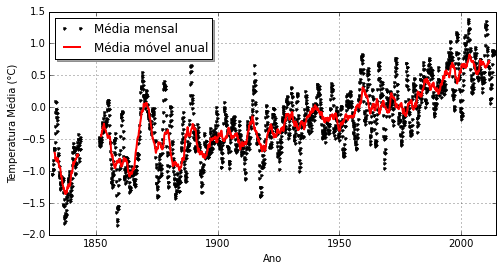

In [130]:
ler_temp('23.31S-42.82W-TAVG-Trend.txt') 

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-mensal-temp-rio.png](images/media-mensal-temp-rio.png)

### Tarefa

Faça uma função que calcule a temperatura média anual a partir das temperaturas mensais. A sua função deve:

* Receber como entrada a lista das datas e a lista das temperaturas mensais.
* Retornar duas listas: uma com os anos e outra com as temperaturas médias correspondetes.
* Anos que não contem dados de todos os 12 meses devem ser ignorados (não incluídos nas listas retornadas).

Utilize sua função para calcular a média anual. Faça um gráfico da temperatura média anual por ano junto com a média móvel anual.

**Dica**: A função `math.floor` retorna o número inteiro que precede um número real. Ex: `math.floor(1984.23) == 1984`

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-anual-temp-rio.png](images/media-anual-temp-rio.png)

## Tarefa Bônus

Salve os dados da média anual em um arquivo CSV (comma separated values) chamado `temp-media-anual.csv`. Os valores devem ser separados por `,`. A primeira coluna deve conter os anos e a segunda as temperaturas. Esse arquivo deve estar presente em seu repositório (dê `git add` nele).